<a href="https://colab.research.google.com/github/codebluecruz/Getting-started-with-github/blob/master/Operations_on_Final_WebMd_Dataset_with_LSTM_on_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is comprised of tab-separated files with reviews. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order.


The sentiment labels are:

1 - negative

2 - somewhat negative

3 - neutral

4 - somewhat positive

5 - positive

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [26]:
# The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and 
# statistical natural language processing for English written in the Python programming language.
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm

Here’s what Keras brings to the table:

The integration with the various backends is seamless
Run training on either CPU/GPU
Comes in two flavours: sequential or functional. Just to ways of thinking about building models. The resulting models are perfectly equivalent. We’re going to use the sequential one.
Fast prototyping – With all these good abstractions in place, you can just focus more on the problem and hyperparameter tunning.

In [27]:
from keras.utils import to_categorical
import random
#set random seed for the session and also for tensorflow that runs in background for keras
import tensorflow
tensorflow.random.set_seed(123)

from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential



In [ ]:
#git hub https://github.com/Stass88/lattelecom
train1 = pd.read_csv('WebMd_otherhalf.csv')
test1 = pd.read_csv('webmd_firsthalf.csv')

In [24]:
train1=train1.dropna()
test1=test1.dropna()

In [7]:
train = train1.drop(columns=['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness', 'Sex', 'Sides', 'UsefulCount'])
test = test1.drop(columns=['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness', 'Sex', 'Sides', 'UsefulCount'])
train.head()

,Reviews,Satisfaction
0,"I have success taking this drug, but have had ...",4.0
1,unfortunately this drug causes me migrane like...,2.0
2,"diagnosed with vertigo, this medication taken ...",4.0
3,Placed on this medicine after being taken off ...,1.0
4,i have only been on this drug for one week. I ...,1.0


In [29]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Reviews']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

In [30]:
#cleaned reviews for both train and test set retrieved


nltk.download('punkt') ## added for GoogleCollab
nltk.download('wordnet') ## added for GoogleCollab

train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


100%|██████████| 99988/99988 [01:21<00:00, 1228.88it/s]

122259
99988


In [40]:
test_sentences

[['i',
  'm',
  'a',
  'retired',
  'physician',
  'and',
  'of',
  'all',
  'the',
  'med',
  'i',
  'have',
  'tried',
  'for',
  'my',
  'allergy',
  'seasonal',
  'and',
  'not',
  'this',
  'one',
  'is',
  'the',
  'most',
  'effective',
  'for',
  'me',
  'when',
  'i',
  'first',
  'began',
  'using',
  'this',
  'drug',
  'some',
  'year',
  'ago',
  'tiredness',
  'a',
  'a',
  'problem',
  'but',
  'is',
  'not',
  'currently'],
 ['cleared',
  'me',
  'right',
  'up',
  'even',
  'with',
  'my',
  'throat',
  'hurting',
  'it',
  'went',
  'away',
  'after',
  'taking',
  'the',
  'medicine'],
 ['why',
  'did',
  'my',
  'ptinr',
  'go',
  'from',
  'a',
  'normal',
  'of',
  'to',
  'over'],
 ['falling', 'and', 'don', 't', 'realise', 'it'],
 ['my',
  'grandfather',
  'wa',
  'prescribed',
  'this',
  'medication',
  'coumadin',
  'to',
  'assist',
  'in',
  'blood',
  'thinning',
  'due',
  'to',
  'a',
  'heart',
  'and',
  'thyroid',
  'condition',
  'his',
  'primary',
 

Collect the dependent values and convert to one-hot encoded output using to_categorical


In [33]:
target=train.Satisfaction.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

In [34]:
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2)
# removed ,stratify=y_target from above statement in Google Collab

In [37]:
X_train

[[],
 ['greatly',
  'lessens',
  'the',
  'uncontrollable',
  'urge',
  'to',
  'move',
  'my',
  'leg',
  'rls',
  'but',
  'doesn',
  't',
  'rid',
  'me',
  'of',
  'it'],
 ['horrible', 'side', 'effect'],
 ['took',
  'the',
  'treximet',
  'a',
  'soon',
  'a',
  'i',
  'wa',
  'able',
  'to',
  'after',
  'my',
  'migraine',
  'began',
  'got',
  'severely',
  'loopy',
  'feeling',
  'immediately',
  'after',
  'i',
  'took',
  'it',
  'that',
  'went',
  'away',
  'in',
  'about',
  'an',
  'hour',
  'and',
  'the',
  'headache',
  'wa',
  'also',
  'gone',
  'but',
  'the',
  'next',
  'day',
  'i',
  'started',
  'getting',
  'blister',
  'on',
  'my',
  'leg',
  'that',
  'would',
  'itch',
  'severely',
  'and',
  'when',
  'i',
  'scratched',
  'would',
  'turn',
  'into',
  'open',
  'stinging',
  'burning',
  'aching',
  'sore',
  'this',
  'continued',
  'up',
  'both',
  'leg',
  'to',
  'my',
  'buttock',
  'and',
  'up',
  'my',
  'back',
  'my',
  'doctor',
  'put',
  

In [ ]:
#It is needed for initializing tokenizer of keras and subsequent padding

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|██████████| 210224/210224 [00:01<00:00, 185899.91it/s]

70403
534


Actual tokenizer of keras and convert to sequences

In [ ]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))

#texts_to_sequences(texts)

    # Arguments- texts: list of texts to turn to sequences.
    #Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)

print(X_train.shape,X_val.shape,X_test.shape)

(210224, 534) (52557, 534) (99988, 534)


Early stopping to prevent overfitting
Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. In this tutorial, you will discover the Keras API for adding early stopping to overfit deep learning neural network models.

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [ ]:
#Model using Keras LSTM

#Multilayer Perceptron (MLP) for multi-class softmax classification:
#Let’s build what’s probably the most popular type of model in NLP at the moment: Long Short Term Memory network. 
#This architecture is specially designed to work on sequence data.
#It fits perfectly for many NLP tasks like tagging and text classification.
#It treats the text as a sequence rather than a bag of words or as ngrams.

#Here’s a possible model definition:

model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 534, 300)          21120900  
_________________________________________________________________
lstm_1 (LSTM)                (None, 534, 128)          219648    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1111      
Total params: 21,397,567
Trainable params: 21,397,567
Non-trainable params: 0
__________________________________________

In [ ]:
#This is done for learning purpose only. One can play around with different hyper parameters combinations
#and try increase the accuracy even more. For example, a different learning rate, an extra dense layer 
# before output layer, etc. Cross validation could be used to evaluate the model and grid search 
# further to find unique combination of parameters that give maximum accuracy. This model has a validation

history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=3, batch_size=1024, verbose=1, callbacks=callback)

Train on 210224 samples, validate on 52557 samples
Epoch 1/3
210224/210224 [==============================] - 5818s 28ms/step - loss: 1.3958 - accuracy: 0.4346 - val_loss: 1.2167 - val_accuracy: 0.5099
Epoch 2/3


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


210224/210224 [==============================] - 5850s 28ms/step - loss: 1.1889 - accuracy: 0.5244 - val_loss: 1.1316 - val_accuracy: 0.5421
Epoch 3/3
210224/210224 [==============================] - 5814s 28ms/step - loss: 1.0898 - accuracy: 0.5605 - val_loss: 1.0974 - val_accuracy: 0.5584


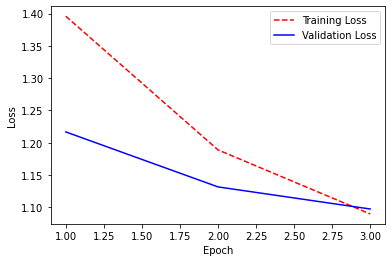

In [ ]:
import matplotlib.pyplot as plt

# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.
#As mentioned before, altering different hyper parameters especially learning rate can have a positive impact
#on accuracy and learning curve.
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#make the predictions with trained model and submit the predictions.
y_pred=model.predict_classes(X_test)


In [ ]:
y_pred

array([5, 5, 5, ..., 5, 1, 5])

In [ ]:
sub_file = pd.read_csv('california_housing_test1.csv',sep=',')
sub_file=test1
sub_file.to_csv('california_housing_test3.csv',index=False)

In [ ]:
sub_file = pd.read_csv('california_housing_test3.csv',sep=',')
sub_file.Satisfaction=y_pred
sub_file.to_csv('california_housing_test5.csv',index=False)